**Iris Liu**

Spring 2020

Data Analysis and Visualization

Project: Matrix Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data
import transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is a **suggested order of implementation** for completing the Transformation class's methods in transformation.py:
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(headers, magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.
- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `transform(C)`: Transforms the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

### Test (i): Translation

- Write a test that does the following. Note the below expected output

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [2]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)

iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
iris_translation_matrix = iris_transformation.translation_matrix(['sepal_length', 'sepal_width', 'petal_length'], [-0.5,0,1.5])
print(iris_translation_matrix)

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [3]:
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
iris_scale_matrix = iris_transformation.scale_matrix(['sepal_length', 'sepal_width', 'petal_length'], [1,2,1/3])
print(iris_scale_matrix)

[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


### Test (iii): Rotation

* Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [4]:
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
iris_rotation_matrix = iris_transformation.rotation_matrix_3d('petal_length', 45)
print(iris_rotation_matrix)

[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


### Test (iv): Perform the compound rotation-translation-scaling transformation to the projected data

- Create a compound transformation matrix in the cell below that applies the above rotation, translation, and scaling (in that order). Remember the data matrix will ultimately go on the right-hand side.
- Use the `transform` method to apply it to the projected data. Print the 1st 5 samples.

In [5]:
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
TRS = iris_scale_matrix @ iris_translation_matrix @ iris_rotation_matrix
print(TRS,'\n')
print(iris_transformation.transform(TRS)[:5])

[[ 0.70711 -0.70711  0.      -0.5    ]
 [ 1.41421  1.41421  0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]] 

[[ 0.63137 12.16224  0.96667  1.     ]
 [ 0.8435  11.17229  0.96667  1.     ]
 [ 0.56066 11.17229  0.93333  1.     ]
 [ 0.56066 10.88944  1.       1.     ]
 [ 0.48995 12.16224  0.96667  1.     ]]


## Task 2) Transformation detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 2a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

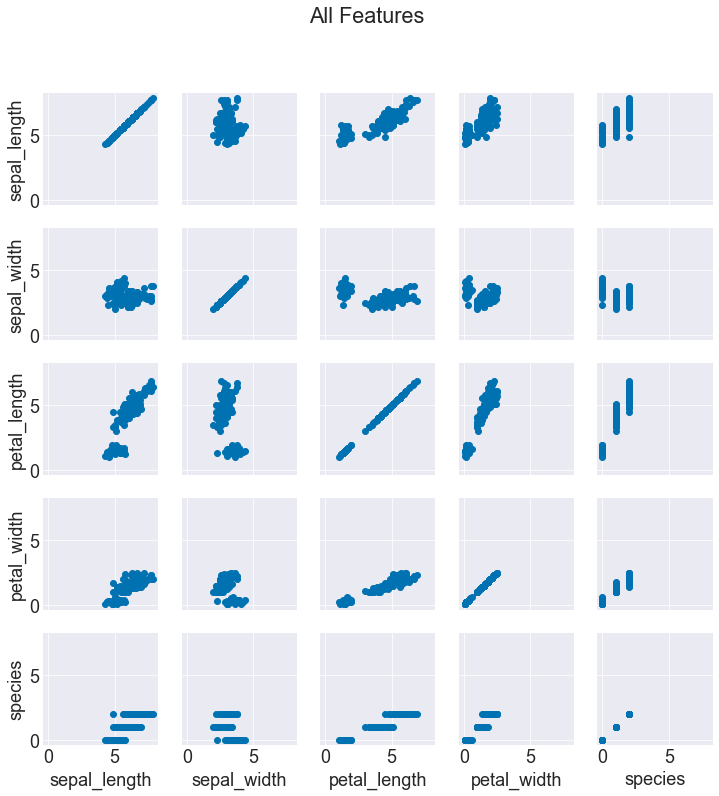

In [6]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_headers = iris_data.get_headers()
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)

fig, axes = iris_transformation.pair_plot(iris_headers, title = "All Features")
iris_transformation.show()

**Question 1:** How many dimensions (features) does the Iris dataset contain?

**Answer 1:**  5 dimensions

### 2b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

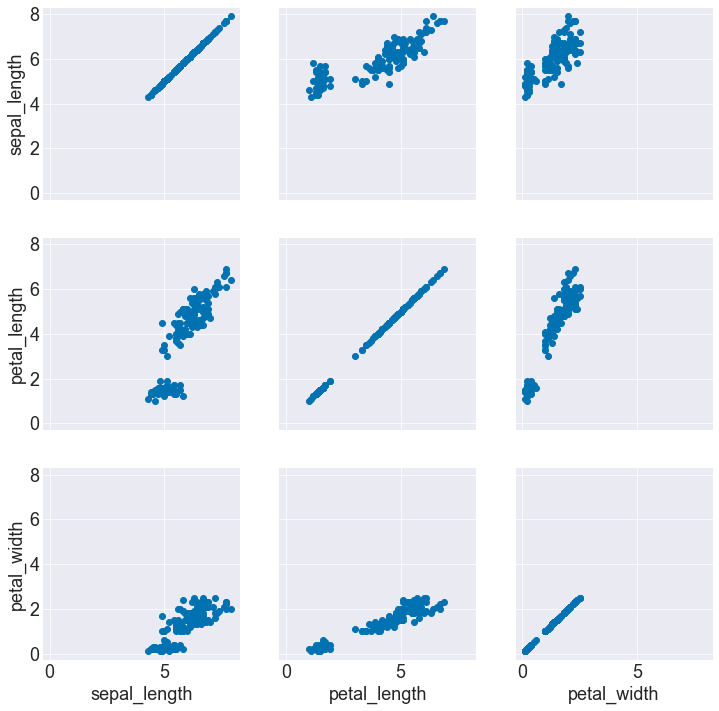

In [7]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = ['sepal_length', 'petal_length', 'petal_width']
iris_transformation.project(iris_headers)

fig, axes = iris_transformation.pair_plot(iris_headers)
iris_transformation.show()

**Question 2:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 2:** This figure might be obtained just by projecting three variables, sepal_length, petal_length, and petal_width. It we had to make transformation, we need translation so that shapes and scales would be preserved)

### 2c) Implement methods that apply a single transformation

Although you already have a method implemented to apply a compound transformation, it can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [8]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)

iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
iris_translated_data = iris_transformation.translate(['sepal_length', 'sepal_width', 'petal_length'], [1,1,1])
print(iris_translated_data[:5])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [9]:
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
iris_scaled_data = iris_transformation.scale(['sepal_length', 'sepal_width', 'petal_length'], [.5,.5,.5])
print(iris_scaled_data[:5])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


#### Test `rotate_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [10]:
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(['sepal_length', 'sepal_width', 'petal_length'])
iris_rotated_data = iris_transformation.rotate_3d('sepal_length', 10)
print(iris_rotated_data[:5])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


### 2d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

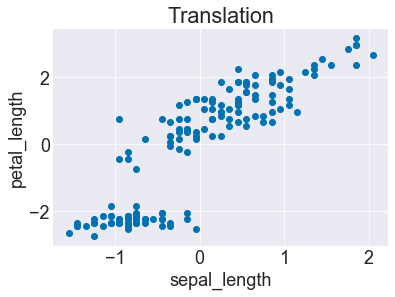

In [11]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_headers = ['sepal_length', 'petal_length']

iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
iris_transformation.translate(iris_headers, [-5.85,-3.74])
fig, axes = iris_transformation.scatter(iris_headers[0], iris_headers[1],title = "Translation")
iris_transformation.show()

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** It was translation because the shape was completely the same so that the data points only shift their position but no scale was performed here. Therefore it was translation. 

### 2e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

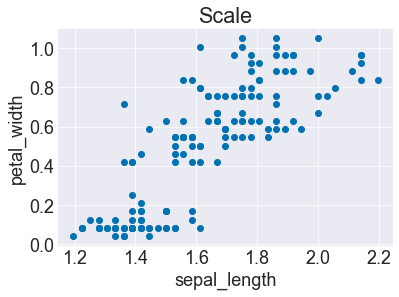

In [12]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_headers = ['sepal_length', 'petal_width']

iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
iris_transformation.scale(iris_headers, [0.278,0.4195])
fig, axes = iris_transformation.scatter(iris_headers[0], iris_headers[1],title = "Scale")
iris_transformation.show()

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 4:** Scale was performed becasue compared to the original graph the current graph shrinks in both x-axis and y-axis. It's now a smaller graph of the original one. 

### 2f) Solve transformation mystery 4

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a pair plot identical to the one below based on the projected/transformed data. 

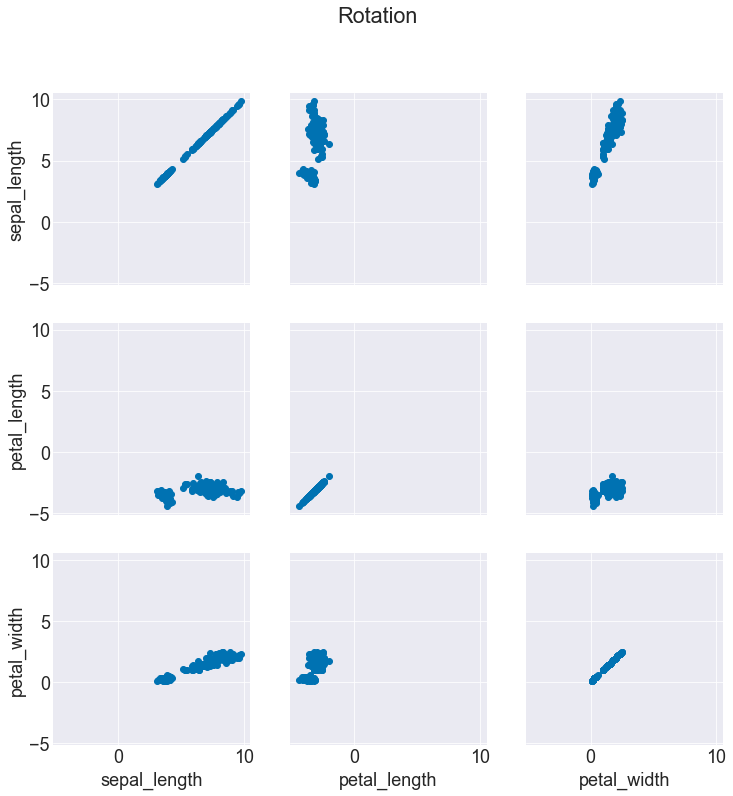

In [13]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = ['sepal_length','petal_length','petal_width']
iris_transformation.project(iris_headers)

iris_transformation.rotate_3d('petal_width', 300)
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Rotation")
iris_transformation.show()

**Question 5:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 5:** It's clear that there was rotation because when compared with the original graph the shapes were flipped. Therefore, there must be rotation. I seemed like sepal_length and petal_length only exchanged places in the graph so I rotated petal_width instead of these two. Then the graph seems to be pretty similar and I just tried out different values for petal_width.

## Task 3) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:
1. All the variables together (entire matrix).
2. All the variables separately/independently.

Implement the following methods to perform each of these operations:
- `normalize_together`: 
- `normalize_separately`: 

### 3a ) Normalize together

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

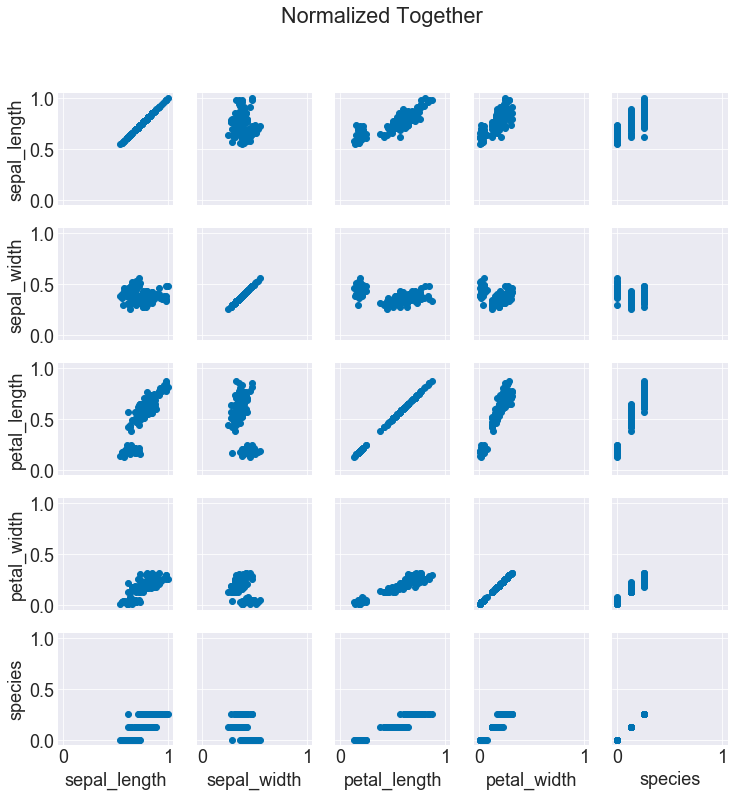

In [14]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = iris_data.get_headers()
iris_transformation.project(iris_headers)

iris_transformation.normalize_together()
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Normalized Together")
iris_transformation.show()

### 3b) Normalize Separately
- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

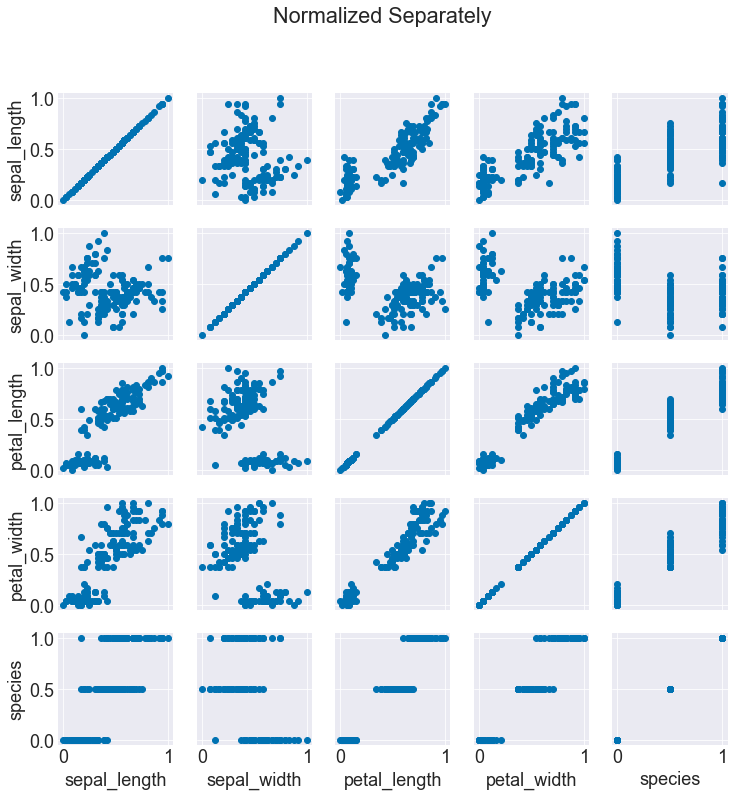

In [15]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = iris_data.get_headers()
iris_transformation.project(iris_headers)

iris_transformation.normalize_separately()
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Normalized Separately")
iris_transformation.show()

**Question 6:** What type(s) of transformation does normalization require?

**Answer 6:** Normalization requires translation (minus min) and scale(divide by max-min).

### 3c) Analysis challenge

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Determine the set of transformations to apply to them.
- Create a pair plot identical to the one below based on the projected/transformed data. 

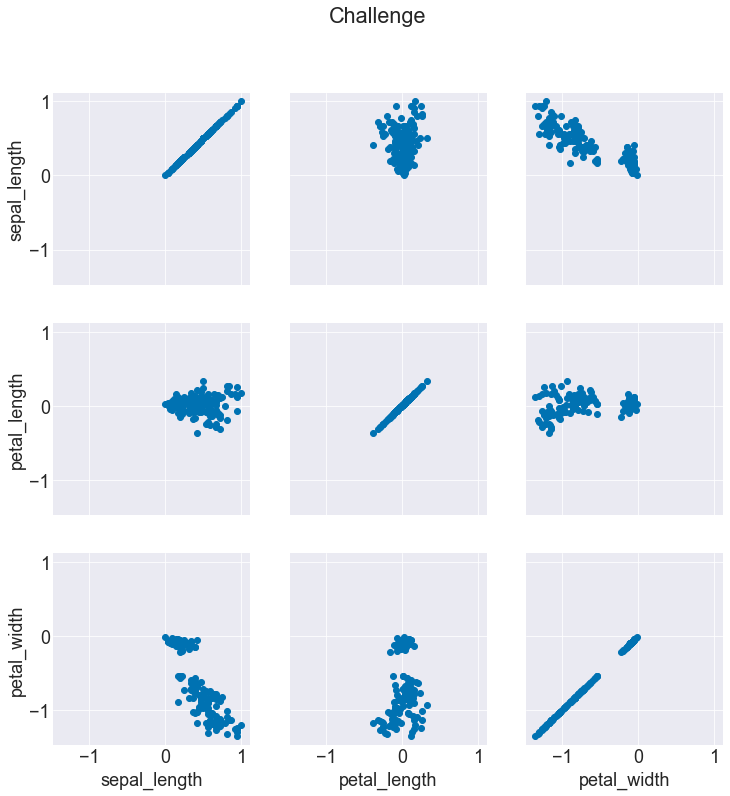

In [16]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = ['sepal_length','petal_length','petal_width']
iris_transformation.project(iris_headers)

iris_transformation.normalize_separately()

iris_transformation.rotate_3d('sepal_length', 225)
iris_transformation.scale(['sepal_length', 'petal_length', 'petal_width'], [1,-2,1])

fig, axes = iris_transformation.pair_plot(iris_headers, title = "Challenge")
iris_transformation.show()

## Task 4) Visualizing multi-dimensional data (>3D)

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

### 4a) Color scales

In this subtask, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - **Section B (Linear Algebra):** Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before plotting.

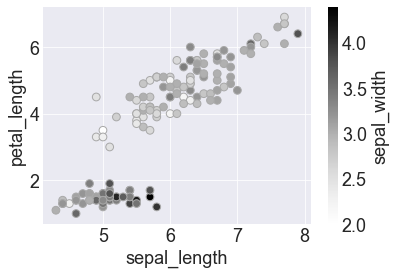

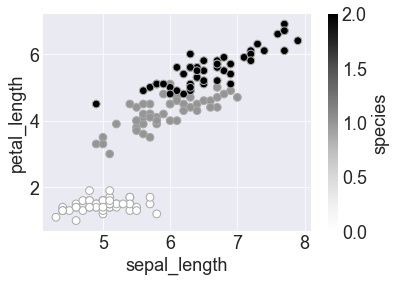

In [17]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_data.get_headers())

iris_transformation.scatter_color('sepal_length','petal_length','sepal_width')
plt.show()

iris_transformation.scatter_color('sepal_length','petal_length','species')
plt.show()

**Question 7:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 7:** It's a more useful representation of discrete features like species because when representing a continuous feature like sepal width, the color actually makes data points harder to read because the color could get very light and therefore does not seem to be useful. 

### 4b) Heatmap

Use the a `heatmap()` method (written for you) to recreate the image below.

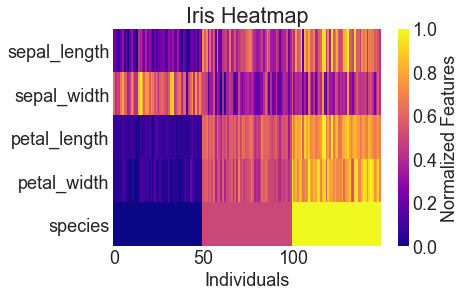

In [18]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_data.get_headers())

iris_transformation.heatmap(iris_data.get_headers(), title='Iris Heatmap', cmap='plasma')
plt.show()

**Question 8:** Does color help you see any patterns in this heatmap that were difficult to see in the scatterplots?

**Question 9:** Are there any characteristics of iris.csv support the readability of this heatmap? Explain your answer.

**Answer 8:** The color helped identify clearly the relative values of each variable and more visually see how things differ cross species. The scatterplot couldn't really do that. 

**Answer 9:** I think the discrete feature, i.e., species, significantly supported the readability of this heatmap because we could clearly see from the plot the three different species and how their data behave differently. 

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### Extension 1. Explore additional visualizations

#### Extension 1 a)
- Implement a 3D-scatter plot version that uses a 3D system + marker color to visualize another dimension of data (up to 4D).

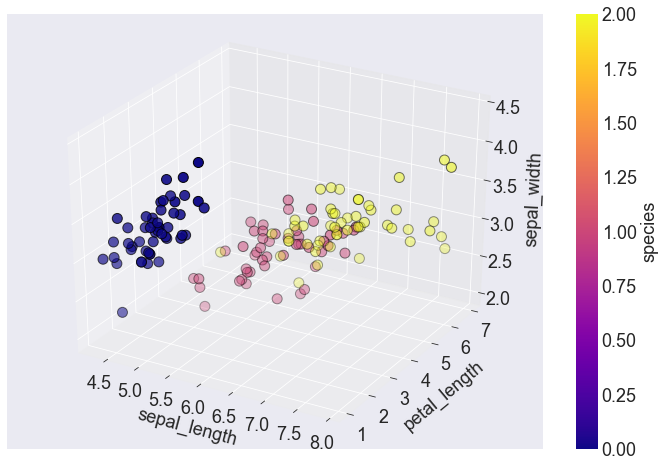

In [19]:
import mpl_toolkits.mplot3d

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_data.get_headers())

iris_headers = ['sepal_length','petal_length','sepal_width','species']
x_data = iris_data.select_data(iris_headers[0]).sum(axis = 1)
y_data = iris_data.select_data(iris_headers[1]).sum(axis = 1)
z_data = iris_data.select_data(iris_headers[2]).sum(axis = 1)
c_data = iris_data.select_data(iris_headers[3]).sum(axis = 1)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
img = ax.scatter(x_data, y_data, z_data, c=c_data, 
                 cmap='plasma', s = 100, edgecolors='black')

ax.set_xlabel(iris_headers[0],labelpad=10)
ax.set_ylabel(iris_headers[1],labelpad=10)
ax.set_zlabel(iris_headers[2],labelpad=10)

fig.colorbar(img).set_label(iris_headers[3])

plt.show()

#### Extension 1 b)
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

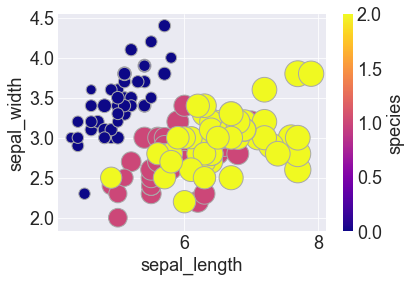

In [20]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_data.get_headers())

iris_headers = ['sepal_length','sepal_width','petal_length','species']
x_data = iris_data.select_data(iris_headers[0]).sum(axis = 1)
y_data = iris_data.select_data(iris_headers[1]).sum(axis = 1)
s_data = iris_data.select_data(iris_headers[2]).sum(axis = 1)
c_data = iris_data.select_data(iris_headers[3]).sum(axis = 1)

fig = plt.scatter(x_data, y_data, marker='o', s = 100*s_data, c = c_data, cmap='plasma',edgecolors='darkgray')
        
plt.xlabel(iris_headers[0])
plt.ylabel(iris_headers[1])
plt.colorbar().set_label(iris_headers[3])

plt.show()

#### Extension 1 c)

This is further made into a general function (4D) that creates a 2D scatter plot with a size representing 3rd dimension a color scale representing the 4th dimension.

**parameters:**
- ind_var: str. Header of the variable that will be plotted along the X axis.
- dep_var: Header of the variable that will be plotted along the Y axis.
- s_var: Header of the variable that will be plotted according to size.
- c_var: Header of the variable that will be plotted along the color axis.
- title: str or None. Optional title that will appear at the top of the figure.

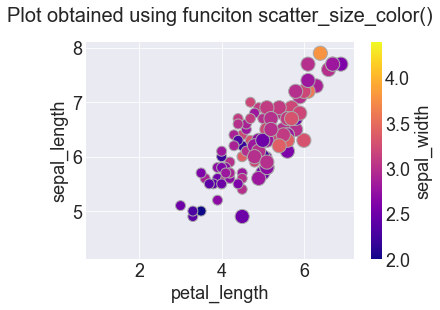

In [21]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_data.read(iris_filename)
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_data.get_headers())

iris_transformation.scatter_size_color('petal_length','sepal_length','species','sepal_width','Plot obtained using funciton scatter_size_color()')
plt.show()

### Extension 2. Perform different matrix transformations on data

In statistics, normalization means to taking a distribution and transforming it into a standard normal distribution (0,1), which means that its mean is 0 and its standard devation is 1. Note that to do that we can use the z-score calculation: **z = (value - mean)/(standard deviation)**

#### Extension 2 a)
- Normalize by Z-score rather than min/max.

First let's try to normalize everything together by writing function normalize_together_zscore() that returns a statistcally normalized version of the project data.

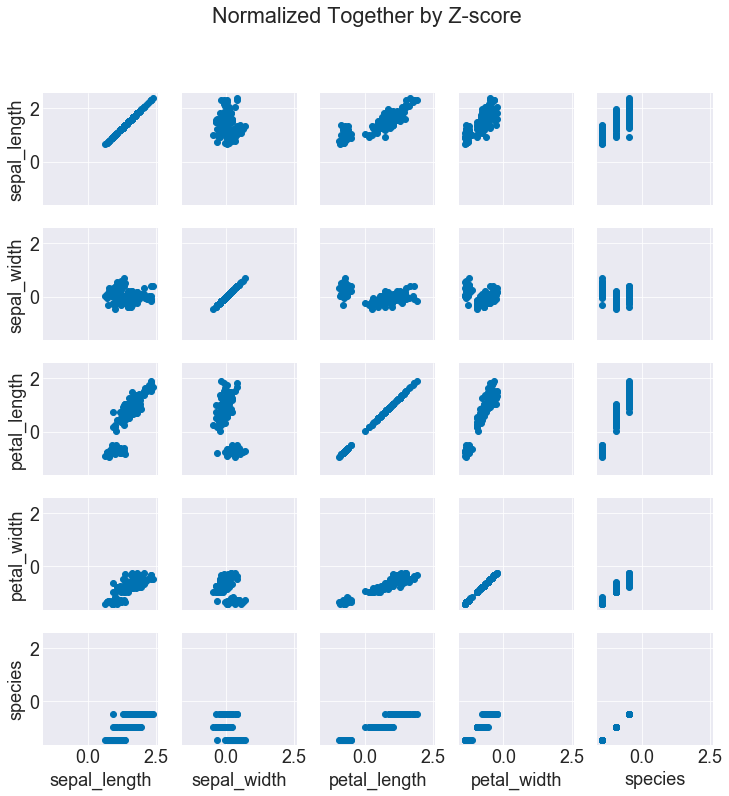

In [22]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = iris_data.get_headers()
iris_transformation.project(iris_headers)

iris_transformation.normalize_together_zscore()
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Normalized Together by Z-score")
iris_transformation.show()

#### *Observe that for normalizing by z-score, it does not make much sense normalizing together because the whole value of z-score was to compare within its own variance (standard deviation)

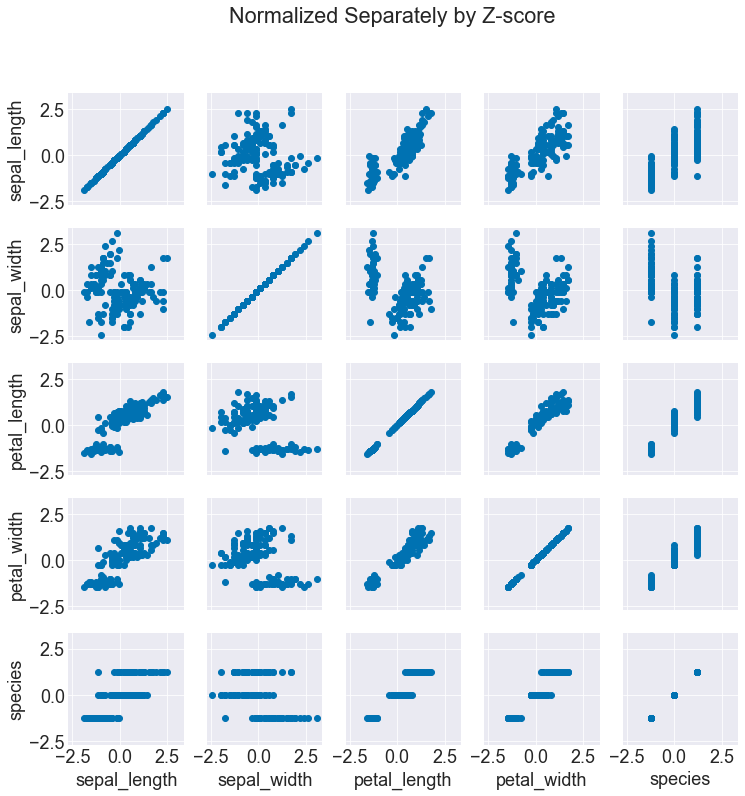

In [23]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = iris_data.get_headers()
iris_transformation.project(iris_headers)

iris_transformation.normalize_separately_zscore()
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Normalized Separately by Z-score")
iris_transformation.show()

#### *Observe that now it makes much more sense: all the plots have its center at (0,0) because all data centers around mean which has been transformed to 0 right now. The data points are also scaled by standard deviation which means that by the 68–95–99.7 rule of stats, almost all data points should lie within 3 standard deviations, which means that now all the data points ideally show in a [-3,3]*[-3,3] grid. This is confirmed by the plot above.

#### Extension 2 b)
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

See normalize_together_vectorization() and normalize_separately_vectorization() functions in transformation.py. Observe that both of them work the same as the original normalization functions we wrote:

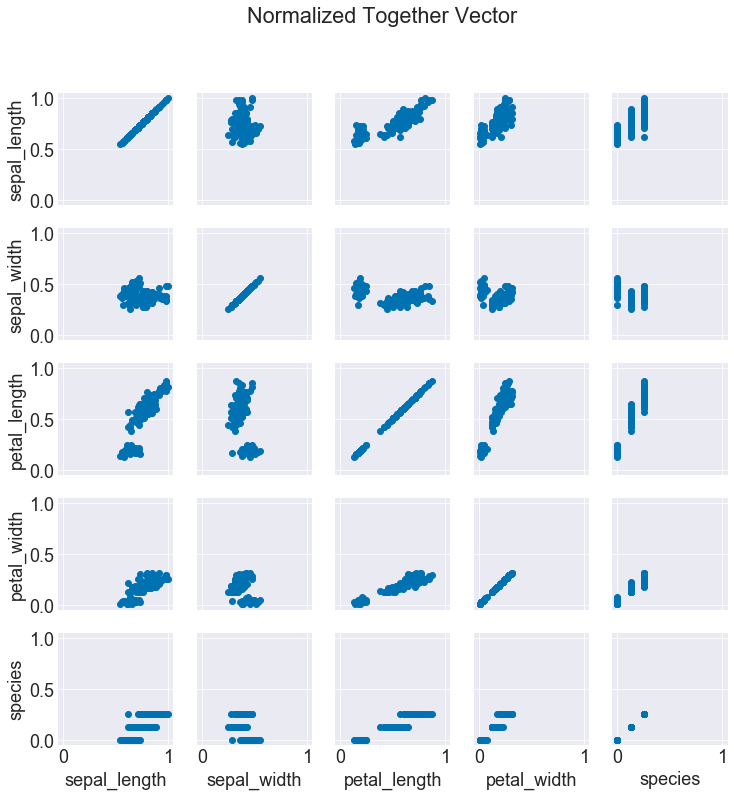

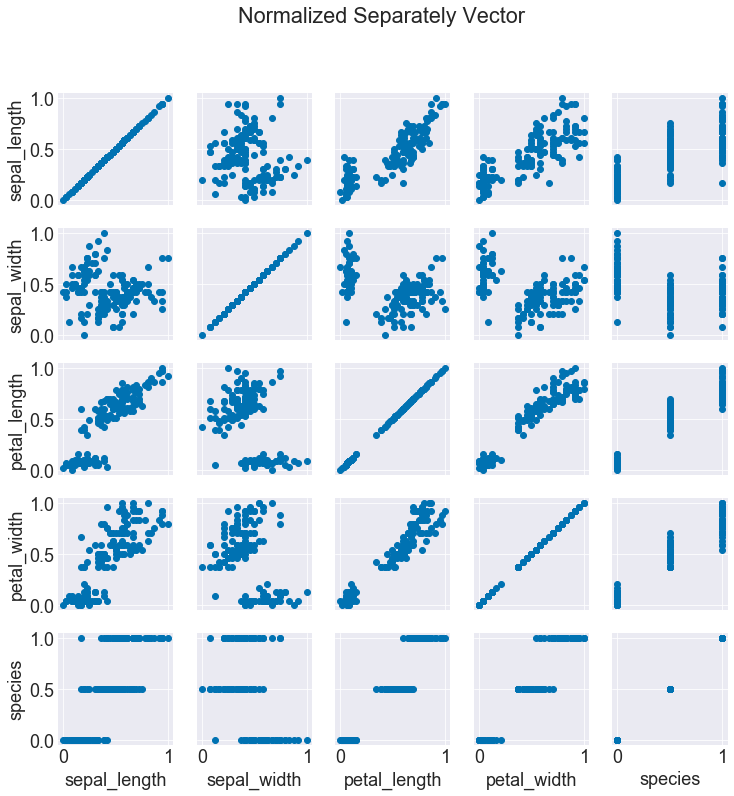

In [24]:
iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = iris_data.get_headers()
iris_transformation.project(iris_headers)
iris_transformation.normalize_together_vectorization()
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Normalized Together Vector")
iris_transformation.show()

iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
iris_transformation.normalize_separately_vectorization()
fig, axes = iris_transformation.pair_plot(iris_headers, title = "Normalized Separately Vector")
iris_transformation.show()

### Time Comparison:

In [25]:
import timeit

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_headers = iris_data.get_headers()

# together - matrix
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
current_time1 = timeit.default_timer() 
iris_transformation.normalize_together()
current_time2 = timeit.default_timer() 
print('time_span_together_matrix = ', current_time2 - current_time1)

# together - vector
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
current_time1 = timeit.default_timer()
iris_transformation.normalize_together_vectorization()
current_time2 = timeit.default_timer()
print('time_span_together_vector = ', current_time2 - current_time1)

# separately - matrix
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
current_time1 = timeit.default_timer() # first moment
iris_transformation.normalize_separately()
current_time2 = timeit.default_timer() # second moment
print('time_span_separately_matrix = ', current_time2 - current_time1)

# separately - vector
iris_transformation = transformation.Transformation(iris_data)
iris_transformation.project(iris_headers)
current_time1 = timeit.default_timer() # first moment
iris_transformation.normalize_separately_vectorization()
current_time2 = timeit.default_timer() # second moment
print('time_span_separately_vector =', current_time2 - current_time1)



time_span_together_matrix =  0.0003035420000045974
time_span_together_vector =  0.00013082200000269495
time_span_separately_matrix =  0.000848736999998323
time_span_separately_vector = 0.00013979700000277262


#### It shows that it's actually faster using vectorization than using matrix transformation.

### 3. Implement and use rotation

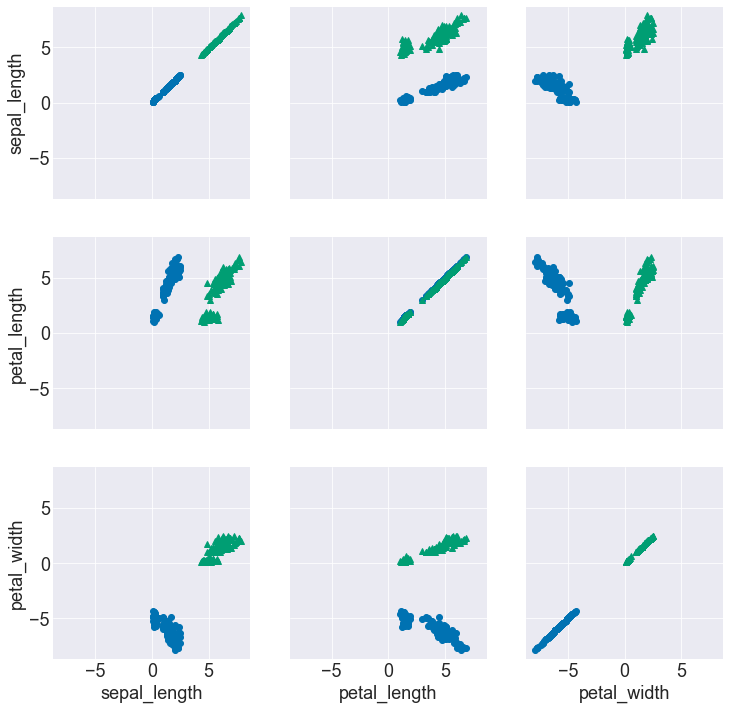

In [26]:
import math

iris_filename = 'iris.csv'
iris_data = data.Data(iris_filename)
iris_transformation = transformation.Transformation(iris_data)

iris_headers = ['sepal_length','petal_length','petal_width']
iris_transformation.project(iris_headers)

degrees = 90
radians = np.radians(degrees)

R_x = np.array([[                 1,                 0,                 0],
                [                 0, math.cos(radians),-math.sin(radians)],
                [                 0, math.sin(radians), math.cos(radians)]
                ])
                
R_y = np.array([[ math.cos(radians),                 0, math.sin(radians)],
                [                 0,                 1,                 0],
                [-math.sin(radians),                 0, math.cos(radians)]
                ])

R_z = np.array([[ math.cos(radians),-math.sin(radians),                 0],
                [ math.sin(radians), math.cos(radians),                 0],
                [                 0,                 0,                 1]
                ])

R = np.dot(R_z, np.dot( R_y, R_x ))

newData = R @ iris_data.select_data(iris_headers).transpose()

fig, axes = plt.subplots(len(iris_headers), len(iris_headers), figsize=(12,12), sharex=True, sharey=True)
for i in range(len(iris_headers)):
    for j in range(len(iris_headers)):
        x1 = iris_data.select_data(iris_headers[i])
        y1 = iris_data.select_data(iris_headers[j])
        x = newData[i]
        y = newData[j]
        axes[i,j].plot(y,x,'o')
        axes[i,j].plot(y1,x1,'^')
        if i == len(iris_headers)-1:
            axes[i,j].set_xlabel(iris_headers[j])
        if j == 0:
            axes[i,j].set_ylabel(iris_headers[i])

#### Recognize that in this case three axes can rotate the same amount of degree together at the same time